<span dir="rtl" style="font-family:B Nazanin" align="right">
    <h1>فصل پنجم: یادگیری ماشین</h1>
    <h2>بخش ششم: استقرار مدل (Model Deployment)</h2>
</span>

In [17]:
import warnings
warnings.filterwarnings('ignore')

<p style="font-family:B Nazanin">
    پس از اینکه مدل‌های یادگیری ماشین آموزش داده شد، باید این مدل آموزش داده‌شده در محلی استقرار یابد (مثلا به عنوان یک سرور تحت وب) تا همه بتوانند از آن استفاده کنند (همه کاربران دانش کدنویسی در زمینه یادگیری ماشین را ندارند و گاهی فقط می‌خواهند از مدل آموزش داده‌شده برای پیش‌بینی استفاده کنند). به این فرایند استقرار مدل می‌گویند. این استقرار به هر زبانی می‌تواند باشد: PHP یا .Net یا Djangp و ... . در این فصل می‌خواهیم با استفاده از کتابخانه StreamLit این فرایند را خیلی ساده بیان کنیم. 
</p>

<p style="font-family:B Nazanin">
    <b>کتابخانه Pickle:</b><br>
    قبل از هر مسئله دیگر با این کتابخانه آشنا می‌شویم. کدهایی که تا الان از آن‌ها استفاده می‌کردیم به صورتی بودند که داده‌ها پیش‌پردازش می‌شدند، مدل ساخته و آموزش داده می‌شد و سپس پیش‌بینی داده‌های جدید با استفاده از مدل انجام می‌شد. اما مشکلی که این کار دارد این است که در هر بار اجرای برنامه باید از اول همه این مراحل تکرار شود تا مجددا به بخش پیش‌بینی برسیم. راه‌حلی که وجود دارد این است که مدلی که ساخته شده است را در فایلی ذخیره کنیم و در هر بار اجرای برنامه آن را خوانده و از آن استفاده کنیم تا دیگر نیازی به اجرای همه مراحل از اول نباشد. همان طور که می‌دانید همه چیز در پایتون به صورت اشیا و نمونه‌هایی از کلاس‌ها ایجاد می‌شوند. کتابخانه Pickle ابزاری است که می‌تواند هر شیئی در پایتون را serialize کرده و به صورت باینری در یک فایل با پسوند pkl ذخیره کند و در استفاده‌های بعدی همان فایل باینری را مجددا بخواند، اطلاعات آن را deserialize کند و از روی آن همان شیء پایتونی را بسازد. به عنوان مثال در مسئله زیر ابتدا یک مدل رگرسیون را آموزش می‌دهیم و سپس مدل آموزش داده‌شده را در یک فایل ذخیره می‌کنیم.
</p>

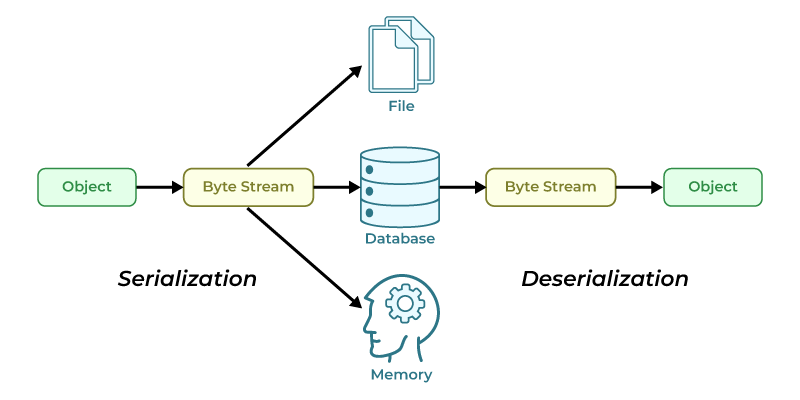

In [2]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import pickle

In [3]:
X, y = make_regression(n_samples=20, n_features=2, random_state=42)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [5]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [6]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

1.0
1.0


In [7]:
modelpred=model.predict([[ 0.65,  1.5]])
modelpred

array([179.29292431])

In [10]:
with open("pickle_files/model.pkl","wb") as file1:
  pickle.dump(model,file1)

<p style="font-family:B Nazanin">
     پس از آن در این پروژه یا هر پروژه دیگری که لازم داشتیم می‌توانیم همین فایل را بخوانیم و از این مدل استفاده کنیم.
</p>

In [12]:
with open("pickle_files/model.pkl","rb") as file2:
  model_pkl=pickle.load(file2)

In [13]:
pred_pkl=model_pkl.predict([[ 0.65,  1.5]])
pred_pkl

array([179.29292431])

<p style="font-family:B Nazanin">
    <b>کتابخانه StreamLit:</b><br>
    کار این کتابخانه ساختن سریع رابط کاربری برای برنامه‌های تحت وب در حوزه داده‌کاوی و یادگیری ماشین است. با استفاده از این کتابخانه بدون داشتن دانش برنامه‌نویسی وب، می‌توانیم داشبوردهای کنترلی تحت وب ایجاد کنیم. برای نصب این کتابخانه دستور زیر را استفاده می‌کنیم (بهتر است در یک محیط مجازی (venv) نصب شود):
</p>

In [14]:
!pip install streamlit

   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.7 MB 2.4 MB/s eta 0:00:04
   ---- ----------------------------------- 1.0/8.7 MB 2.3 MB/s eta 0:00:04
   ------- -------------------------------- 1.6/8.7 MB 2.3 MB/s eta 0:00:04
   --------- ------------------------------ 2.1/8.7 MB 2.3 MB/s eta 0:00:03
   ----------- ---------------------------- 2.6/8.7 MB 2.4 MB/s eta 0:00:03
   -------------- ------------------------- 3.1/8.7 MB 2.4 MB/s eta 0:00:03
   ---------------- ----------------------- 3.7/8.7 MB 2.4 MB/s eta 0:00:03
   ------------------- -------------------- 4.2/8.7 MB 2.5 MB/s eta 0:00:02
   -------------------- ------------------- 4.5/8.7 MB 2.3 MB/s eta 0:00:02
   ---------------------- ----------------- 5.0/8.7 MB 2.4 MB/s eta 0:00:02
   -------------------------- ------------- 5.8/8.7 MB 2.4 MB/s eta 0:00:02
   -----------------------

<p style="font-family:B Nazanin">
     از اینجا به بعد هر فایل کدی که نوشته شود، برای اجرا باید در محیط فرمان دستور زیر را بنویسیم:
</p>

In [ ]:
streamlit run <filename>

<p style="font-family:B Nazanin">
     برای نوشتن متن در وبسایت از دستورات زیر استفاده می‌کنیم: 
</p>

In [15]:
import streamlit as st

In [ ]:
st.title("Hello Streamlit")         # برای عنوان صفحه
st.header("Hello Streamlit")        # برای عنوان هر بخش
st.write("Hello Streamlit")         # برای نوشتن متن ساده
st.info("Hello Streamlit")          # برای نوشتن متن اعلانات (متن با کادر آبی)
st.success("Hello Streamlit")       # برای نوشتن متن پیام موفقیت (متن با کادر سبز)
st.warning("Hello Streamlit")       # برای نوشتن متن پیام هشدار (متن با کادر زرد)
st.error("Hello Streamlit")         # برای نوشتن متن پیام خطا (متن با کادر قرمز)

<p style="font-family:B Nazanin">
     خروجی این هفت دستور مشابه عکس زیر خواهد بود:
</p>

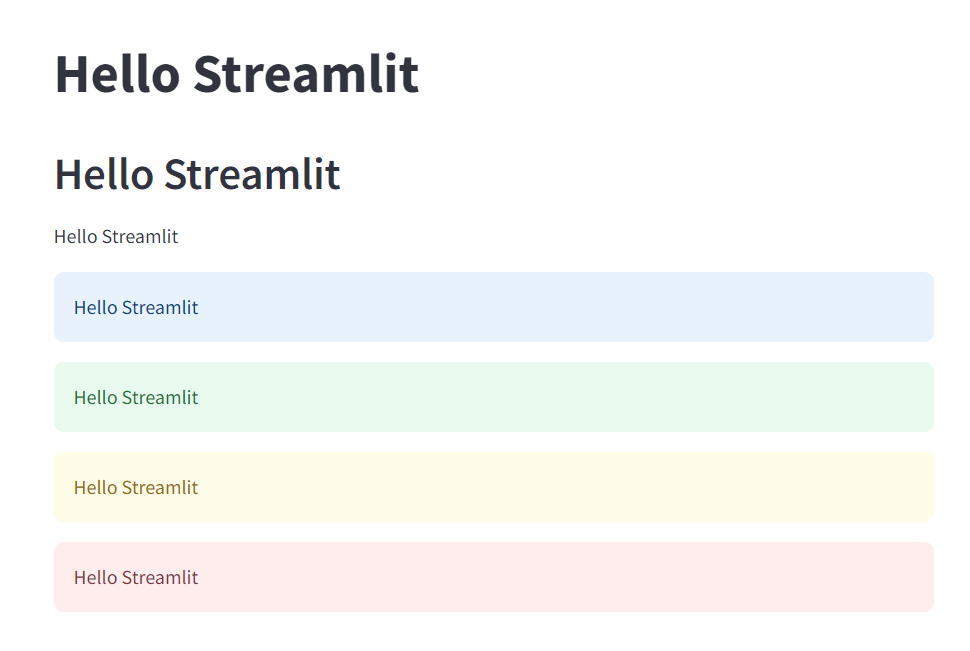

<p style="font-family:B Nazanin">
     برای نوشتن متن با دستورات Markdown از کد زیر استفاده می‌کنیم:
</p>

In [ ]:
st.markdown("### Hello Streamlit")
st.markdown("<h2 style='color:blue;'>Hello Streamlit</h2>", unsafe_allow_html=True)

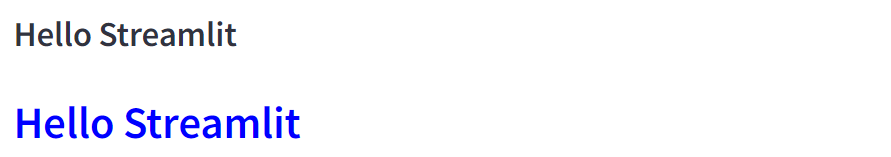

<p style="font-family:B Nazanin">
     نوشتن فرمول‌های ریاضی و بسیاری از موارد دیگر با استفاده از فرمت LaTeX می‌تواند انجام شود:
</p>

In [ ]:
st.latex(r"\int_0^\infty e^{-x^2} \, dx = \frac{\sqrt{\pi}}{2}")

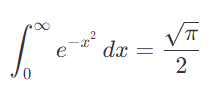

<p style="font-family:B Nazanin">
     آرایه‌های numpy را اگر با استفاده از تابع write بنویسیم، به صورت خودکار جدولی نشان داده می‌شود. حتی در کنار جدول گزینه‌ای جهت ذخیره کردن داده‌ها با فرمت csv نشان می‌دهد.
</p>

In [ ]:
a = np.array([12, 3, 5, 667, 5, 34, 656, 756, 765, 435,])
st.write(a)

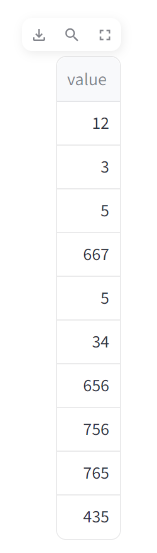

<p style="font-family:B Nazanin">
    داده‌های جدولی را هم به این دو صورت می‌توان نشان داد: 
</p>

In [ ]:
df = pd.read_csv("data/iris.csv")
st.dataframe(df)

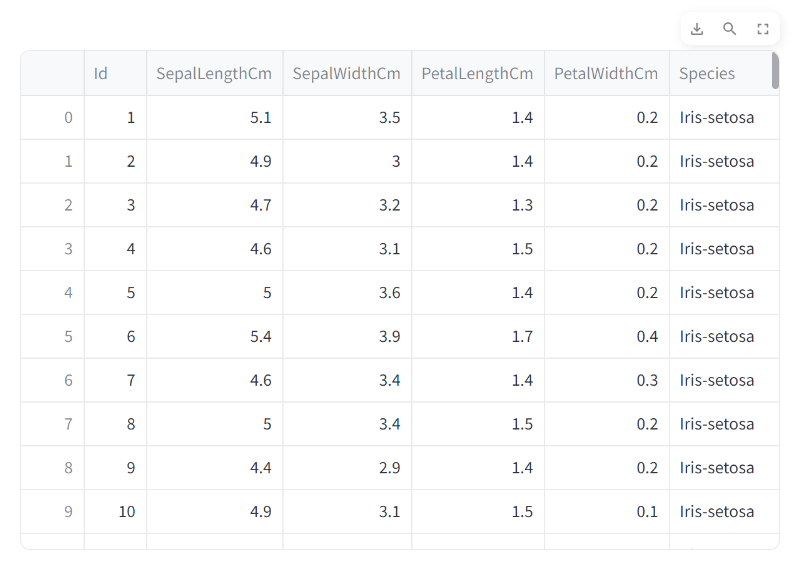

In [ ]:
st.table(df) # قابلیت اسکرول و ذخیره کردن ندارد

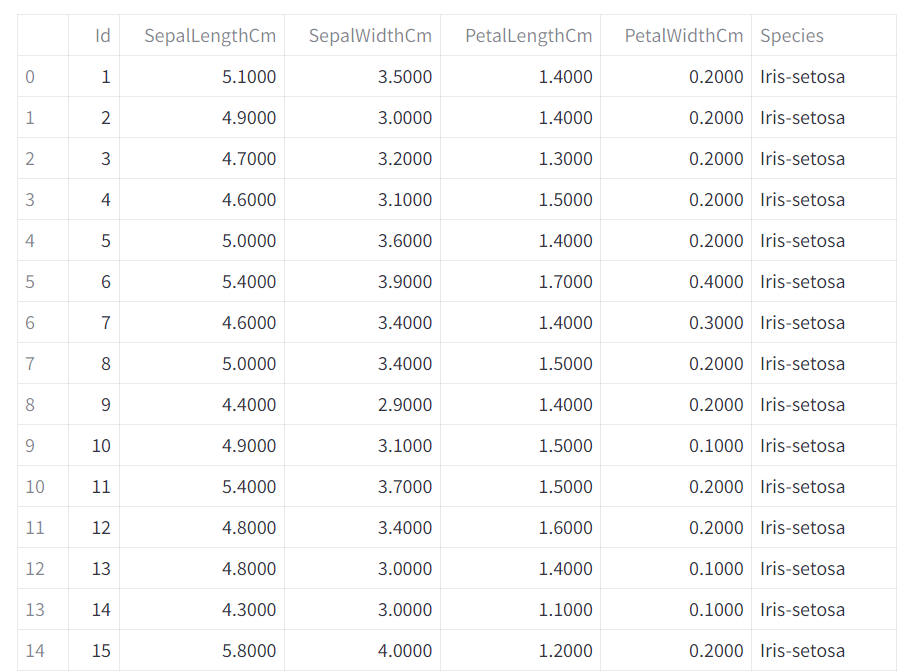

<p style="font-family:B Nazanin">
     برای نشان دادن عکس‌ها از دستور زیر استفاده می‌کنیم:
</p>

In [ ]:
from PIL import Image
img1=Image.open("images/ai-master.webp")
st.image(img1)

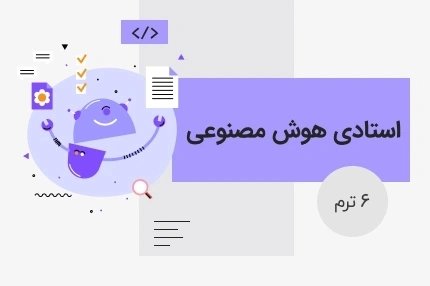

<p style="font-family:B Nazanin">
     برای ساختن فرم‌هایی که بتواند اطلاعات ورودی را از کاربر بگیرد، به صورت زیر عمل می‌کنیم:
</p>

In [ ]:
with st.form(key='my_form'):
    name=st.text_input(label="Name")
    password = st.text_input(label="Password", type="password")
    age = st.number_input(label="Age", min_value=0, max_value=120, step=1)
    gender=st.selectbox(label="Gender",options=["Male","Female"])
    colors=st.multiselect(label="Colors",options=["Red","Green","Blue","Yellow","Pink","Black","White"])
    address=st.text_area(label="Address")
    avg=st.slider(label="Avg", min_value=0.0, max_value=20.0, step=0.1)
    birthdate=st.date_input(label="Birth Date")
    photo=st.file_uploader(label="Photo")
    submit=st.form_submit_button("Register")

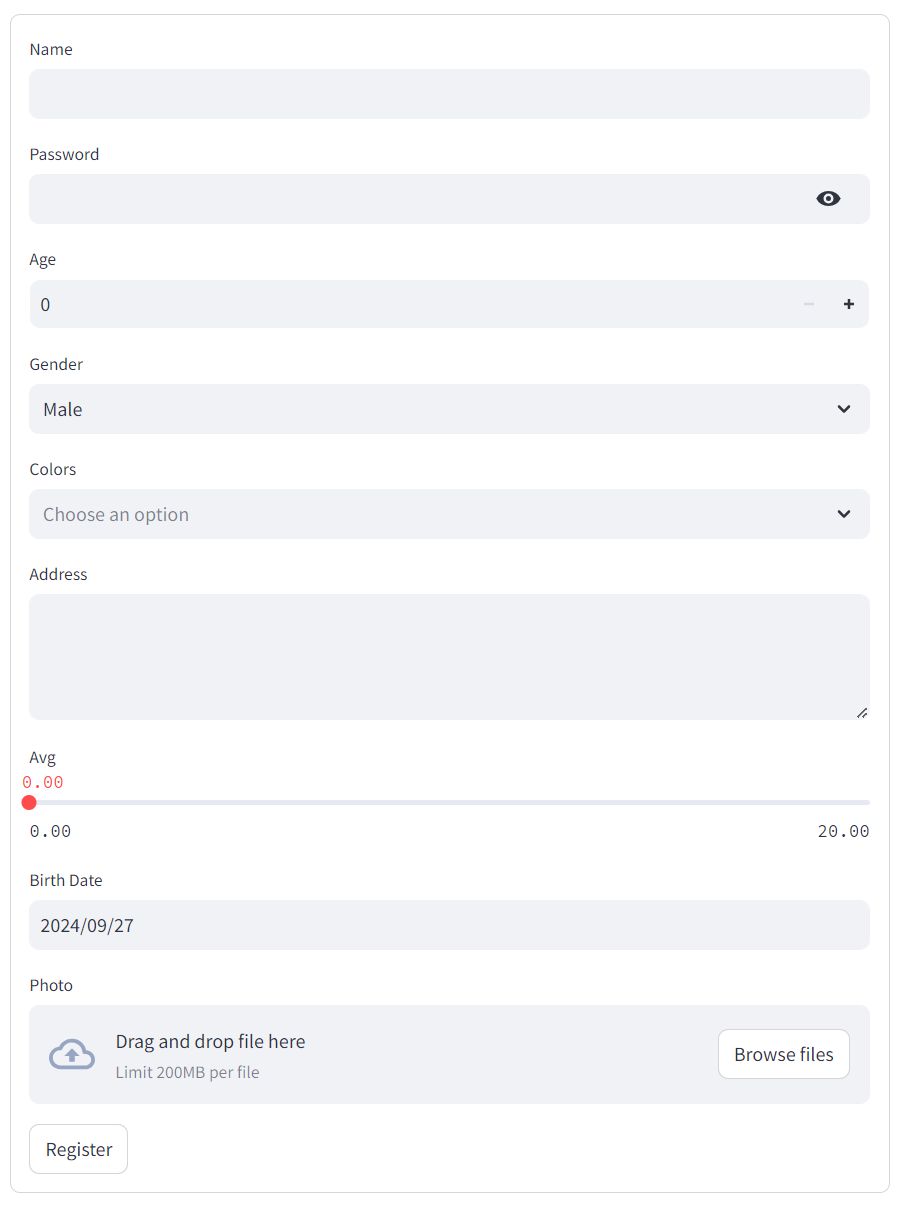

<p style="font-family:B Nazanin">
     اطلاعاتی که در فرم وارد می‌شود را به صورت زیر می‌توانیم بخوانیم و از آن استفاده کنیم:
</p>

In [ ]:
if submit:
    st.write(f'Name: {name}')
    st.write(f'Password: {password}')
    st.write(f'Age: {age}')
    st.write(f'Gender: {gender}')
    st.write(f'Colors: {colors}')
    st.write(f'Address: {address}')
    st.write(f'Avg: {avg}')
    st.write(f'Birth Date: {birthdate}')
    img1=Image.open(photo)
    st.image(img1)

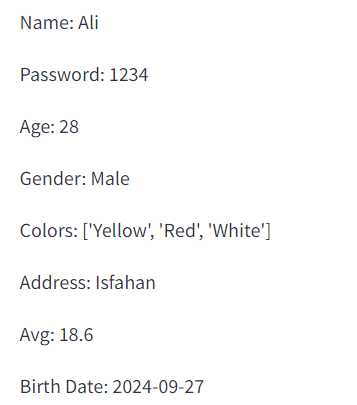

<p style="font-family:B Nazanin">
     برای اضافه کردن sidebar به کنار صفحه از دستور زیر استفاده می‌کنیم:
</p>

In [ ]:
st.sidebar.header("Sidbar")
st.sidebar.markdown("### Item1")
st.sidebar.markdown("### Item2")
st.sidebar.markdown("### Item3")
st.sidebar.markdown("### Item4")
st.sidebar.button("Test Button")

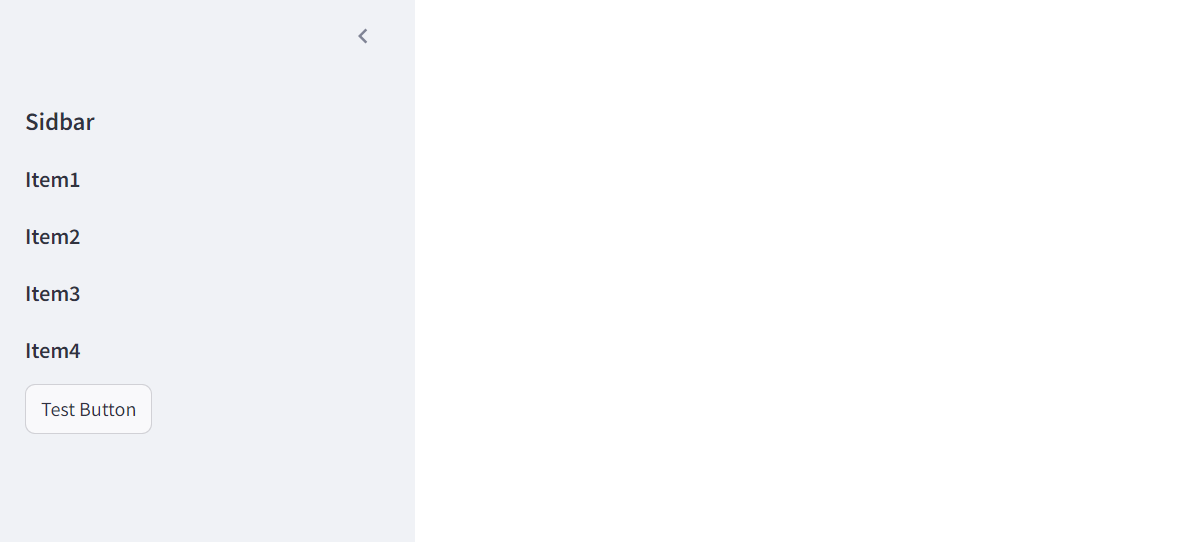

<p style="font-family:B Nazanin">
     برای رسک نمودار از دستور st.pyplot استفاده می‌کنیم:
</p>

In [ ]:
data = np.random.rand(20)
fig, ax = plt.subplots()
ax.plot(data, label='Value')
ax.set_xlabel('Index')
ax.set_ylabel('Value')
ax.set_title('Line Chart')
ax.legend()
st.pyplot(fig)

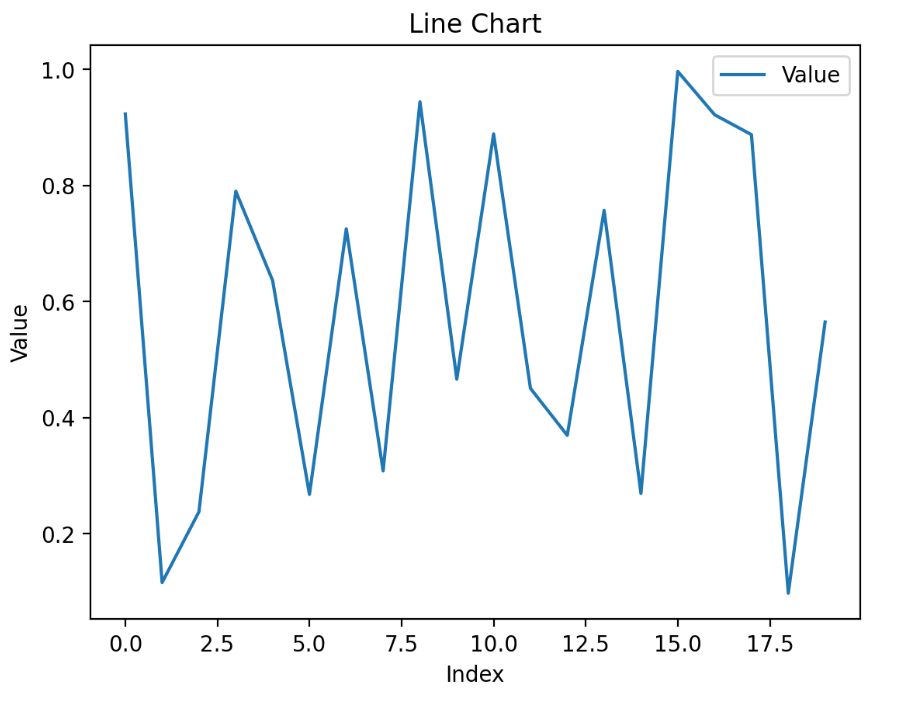

<p style="font-family:B Nazanin">
     در ادامه یک مثال جامع را با هم می بینیم:
</p>

In [ ]:
import streamlit as st

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

st.title("Iris Dataset Classification with PCA")

iris = datasets.load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name='species')


test_size = st.slider("Test Data Size Percentage:", 0.1, 0.9, 0.2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)


model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
st.markdown(f'<span style="color:green; font-weight:900;">Accuracy :</span>', unsafe_allow_html=True)
st.write(f'{accuracy:.2f}')

conf_matrix = confusion_matrix(y_test, y_pred)
st.markdown(f'<span style="color:green; font-weight:900;">Confusion Matrix :</span>', unsafe_allow_html=True)
st.write(conf_matrix)


report = classification_report(y_test, y_pred, target_names=iris.target_names)
st.markdown(f'<span style="color:green; font-weight:900;">Classification Report :</span>', unsafe_allow_html=True)
st.text(report)



pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
df_pca = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
df_pca['species'] = y



st.markdown(f'<span style="color:green; font-weight:900;">PCA DataFrame</span>', unsafe_allow_html=True)
st.dataframe(df_pca)



st.markdown(f'<span style="color:green; font-weight:900;">Scatter Plot using PCA</span>', unsafe_allow_html=True)
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue=iris.target_names[df_pca['species']], palette='Set1', data=df_pca, ax=ax)
ax.set_title("Dimensionality Reduction of Iris Dataset to 2 Components using PCA")
st.pyplot(fig)

 
st.sidebar.header("Enter Feature Values:")
sepal_length = st.sidebar.slider("Sepal Length", float(X['sepal length (cm)'].min()), float(X['sepal length (cm)'].max()), float(X['sepal length (cm)'].mean()))
sepal_width =  st.sidebar.slider("Sepal Width", float(X['sepal width (cm)'].min()), float(X['sepal width (cm)'].max()), float(X['sepal width (cm)'].mean()))
petal_length = st.sidebar.slider("Petal Length", float(X['petal length (cm)'].min()), float(X['petal length (cm)'].max()), float(X['petal length (cm)'].mean()))
petal_width =  st.sidebar.slider("Petal Width", float(X['petal width (cm)'].min()), float(X['petal width (cm)'].max()), float(X['petal width (cm)'].mean()))


input_data = [[sepal_length, sepal_width, petal_length, petal_width]]
prediction = model.predict(input_data)
prediction_proba = model.predict_proba(input_data)

btn=st.sidebar.button("Predict")

if btn:
    st.sidebar.markdown(f'<span style="color:green; font-weight:900;">Predicted Class:</span>', unsafe_allow_html=True)
    st.sidebar.write(f"{iris.target_names[prediction][0]}")
    st.sidebar.markdown(f'<span style="color:green; font-weight:900;">Prediction Probabilities:</span>', unsafe_allow_html=True)
    for i, prob in enumerate(prediction_proba[0]):
        st.sidebar.write(f"{iris.target_names[i]}: {prob:.2f}") 

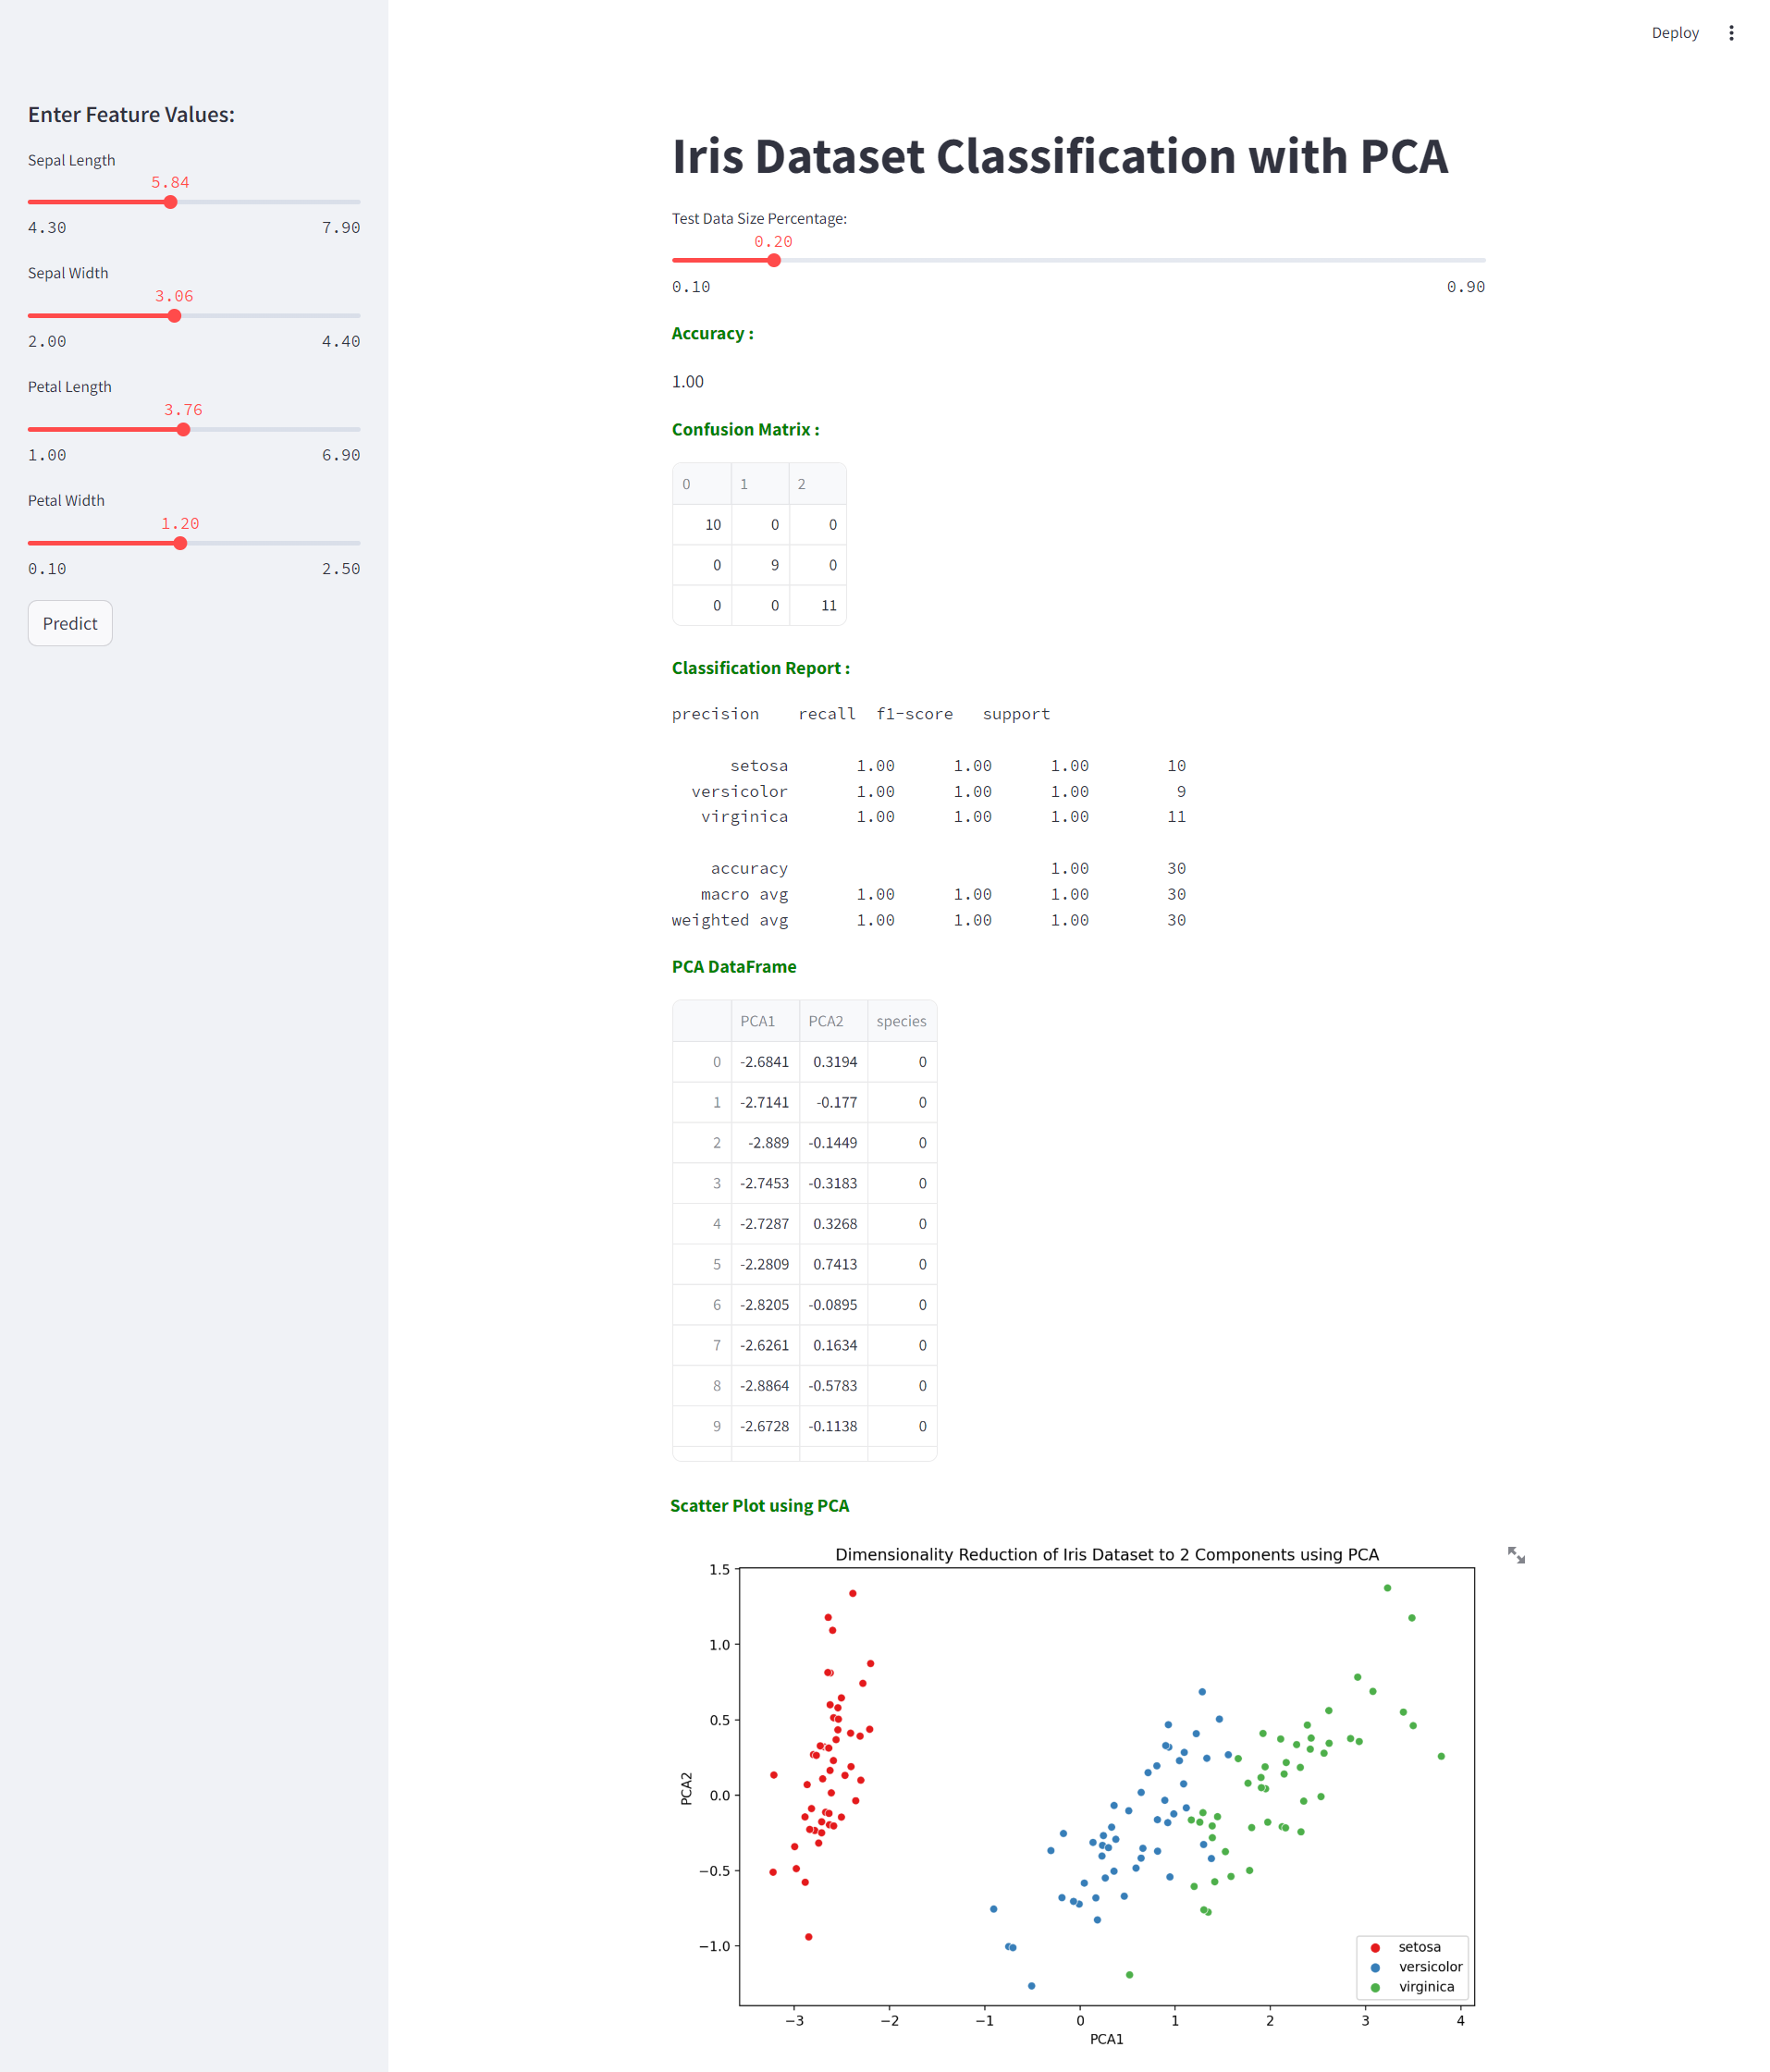

<p style="font-family:B Nazanin">
     در نهایت پروژه نهایی را می‌توان روی یک سرور deploy کرد تا آماده استفاده همه باشد.
</p>